Yolov8에서 Segmentation을 해봅시다

https://docs.ultralytics.com/tasks/segment/#models

우선 기본 예시의 데이터셋을 다운로드 하고 학습해보고, 구조를 살펴보겠습니다. 

In [3]:
!git clone https://github.com/ultralytics/ultralytics
%cd ultralytics
%pip install -e .

Cloning into 'ultralytics'...
remote: Enumerating objects: 9484, done.
remote: Counting objects: 100% (1605/1605), done.
remote: Compressing objects: 100% (799/799), done.
remote: Total 9484 (delta 1040), reused 1250 (delta 802), pack-reused 7879
Receiving objects: 100% (9484/9484), 6.23 MiB | 13.56 MiB/s, done.
Resolving deltas: 100% (6352/6352), done.
/content/ultralytics
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/ultralytics
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.5/206.5 kB 5.4 MB/s eta 0:00:00
  Running setup.py develop for ultralytics


기본 모델을 불러와서 어떻게 결과가 나오는지 살펴봅시다

In [4]:
from ultralytics import YOLO
model = YOLO('yolov8n-seg.pt') 
results = model('https://ultralytics.com/images/bus.jpg')

100%|██████████| 6.73M/6.73M [00:00<00:00, 39.0MB/s]

100%|██████████| 476k/476k [00:00<00:00, 10.9MB/s]
image 1/1 /content/ultralytics/bus.jpg: 640x480 4 persons, 1 bus, 1 skateboard, 453.2ms
Speed: 18.2ms preprocess, 453.2ms inference, 145.3ms postprocess per image at shape (1, 3, 640, 640)


In [5]:
results


[ultralytics.yolo.engine.results.Results object with attributes:
 
 boxes: ultralytics.yolo.engine.results.Boxes object
 keypoints: None
 keys: ['boxes', 'masks']
 masks: ultralytics.yolo.engine.results.Masks object
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 5

https://github.com/ultralytics/ultralytics/blob/main/ultralytics/yolo/engine/results.py

Results Object는 위의 코드에 있음

In [6]:
results[0].plot()

array([[[123, 149, 172],
        [124, 151, 174],
        [126, 154, 178],
        ...,
        [157, 169, 184],
        [158, 170, 185],
        [158, 170, 185]],

       [[124, 150, 174],
        [125, 152, 175],
        [126, 154, 178],
        ...,
        [157, 169, 184],
        [158, 170, 185],
        [158, 170, 185]],

       [[127, 153, 177],
        [127, 153, 177],
        [126, 154, 178],
        ...,
        [158, 170, 185],
        [158, 170, 185],
        [158, 170, 185]],

       ...,

       [[182, 182, 188],
        [180, 180, 186],
        [178, 178, 184],
        ...,
        [113, 106, 111],
        [114, 106, 111],
        [115, 106, 111]],

       [[157, 157, 163],
        [164, 164, 170],
        [175, 176, 181],
        ...,
        [105,  97, 102],
        [106,  97, 102],
        [106,  97, 102]],

       [[140, 140, 147],
        [153, 154, 160],
        [173, 175, 179],
        ...,
        [101,  91,  96],
        [101,  91,  96],
        [101,  92,  97]]

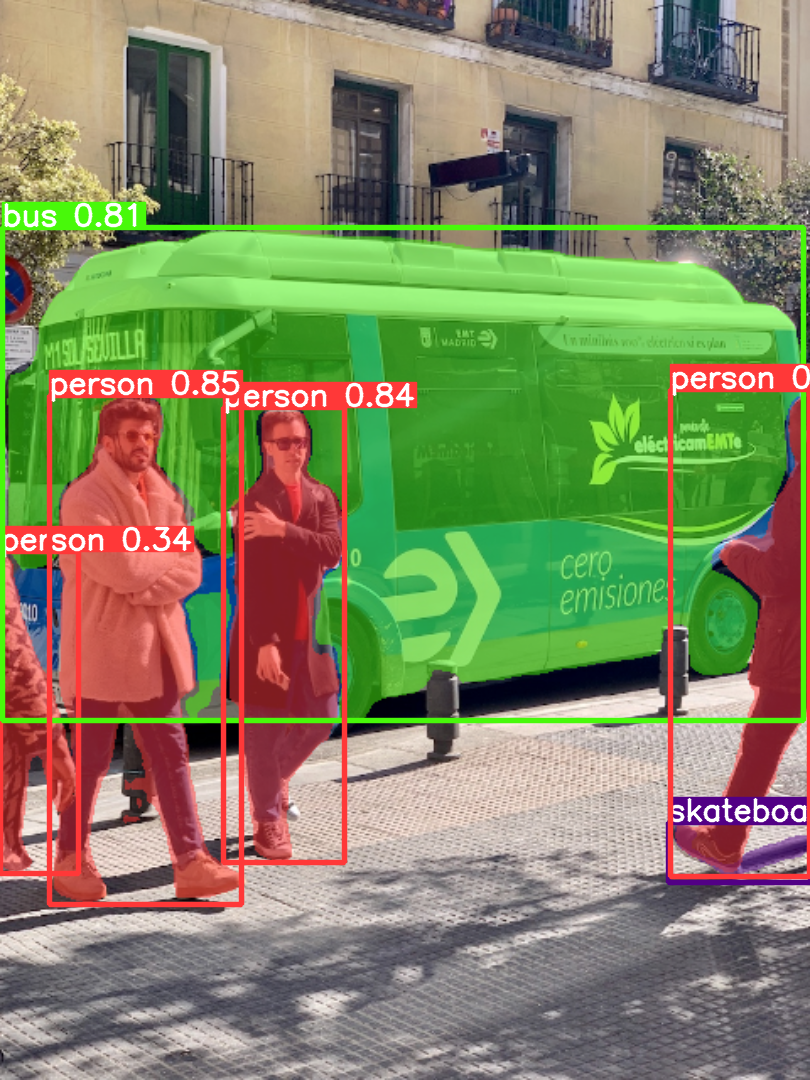

In [7]:
from google.colab.patches import cv2_imshow
res_plotted = results[0].plot()
cv2_imshow(res_plotted)

box 없이 mask만 출력해봅시다

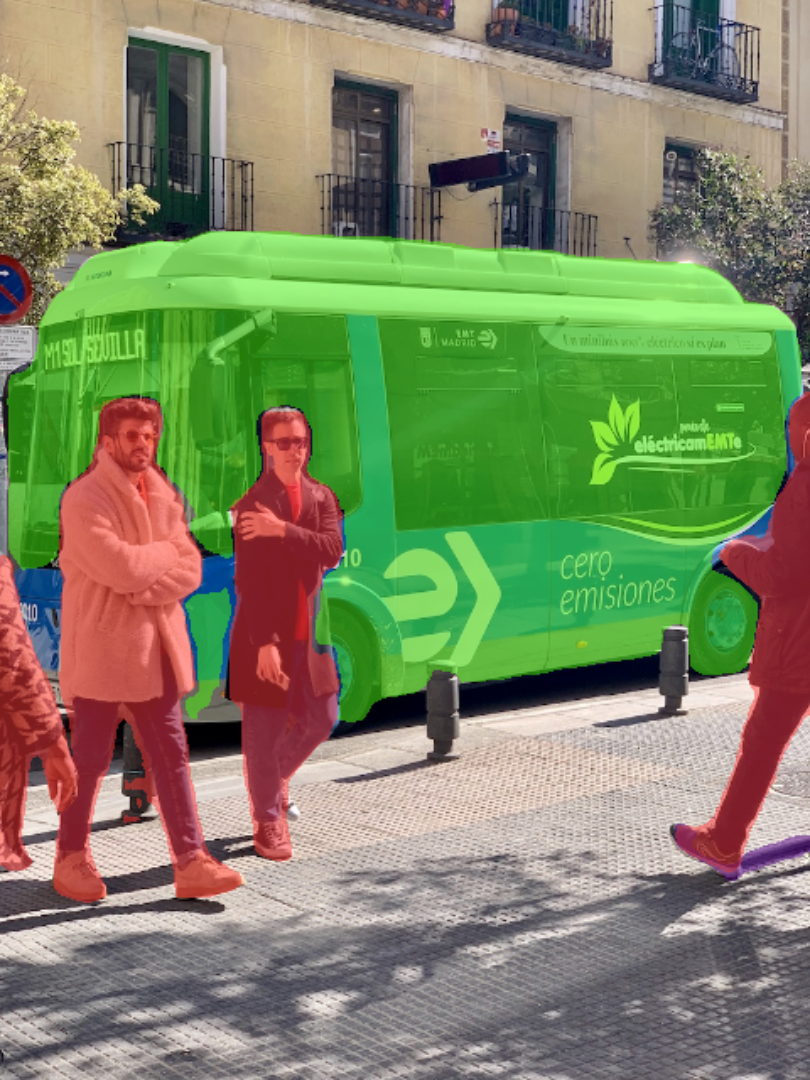

In [8]:
res_plotted = results[0].plot(boxes=False)
cv2_imshow(res_plotted)

mask 데이터를 살펴봅시다. 

In [9]:
results[0].masks[0].data

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

In [12]:
results[0].masks[0].shape

torch.Size([1, 640, 480])

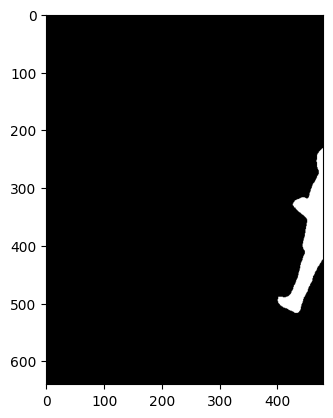

In [14]:
import matplotlib.pyplot as plt
plt.imshow(results[0].masks[0].data[0], cmap='gray')